In [ ]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [ ]:
# 파이토치 관련 라이브러리

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
# 디바이스 할당

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
# 공통 함수 다운로드
!git clone https://github.com/wikibook/pythonlibs.git

# 공통 함수 불러오기
from pythonlibs.torch_lib1 import *

# 공통 함수 확인
print(README)

Cloning into 'pythonlibs'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 25 (delta 6), reused 25 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 21.10 MiB | 41.39 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Common Library for PyTorch
Author: M. Akaishi


# Transforms 정의

In [ ]:
# transform1 1차원 변경
transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1))
])

# transform2 정규화만 실시
transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

# 데이터셋 정의

In [ ]:
data_root = './data'

# 훈련 데이터셋(1차원 텐서 버전)
train_set1 = datasets.CIFAR10(
    root=data_root, train=True,
    download=True, transform=transform1
)

# 검증 데이터셋(1차원 텐서 버전)
test_set1 = datasets.CIFAR10(
    root=data_root, train=False,
    download=True, transform=transform1
)

# 훈련 데이터셋(3차원 텐서 버전)
train_set2 = datasets.CIFAR10(
    root=data_root, train=True,
    download=True, transform=transform2
)

# 검증 데이터셋(3차원 텐서 버전)
test_set2 = datasets.CIFAR10(
    root=data_root, train=False,
    download=True, transform=transform2
)

100%|██████████| 170M/170M [00:03<00:00, 53.5MB/s]


In [ ]:
# 데이터셋 확인
image1, label1 = train_set1[0]
image2, label2 = train_set2[0]

print(image1.shape)
print(image2.shape)

torch.Size([3072])
torch.Size([3, 32, 32])


# 데이터로더

In [ ]:
batch_size = 100

train_loader1 = DataLoader(train_set1, batch_size=batch_size, shuffle=True)

test_loader1 = DataLoader(test_set1, batch_size=batch_size, shuffle=False)

train_loader2 = DataLoader(train_set2, batch_size=batch_size, shuffle=True)

test_loader2 = DataLoader(test_set2, batch_size=batch_size, shuffle=False)

In [ ]:
# train_loader1에서 한 세트 가져오기
for images1, labels1 in train_loader1:
  break

# train_loader2에서 한 세트 가져오기
for images2, labels2 in train_loader2:
  break

print(image1.shape)
print(image2.shape)

torch.Size([3072])
torch.Size([3, 32, 32])


# 검증 데이터를 이미지로 표시

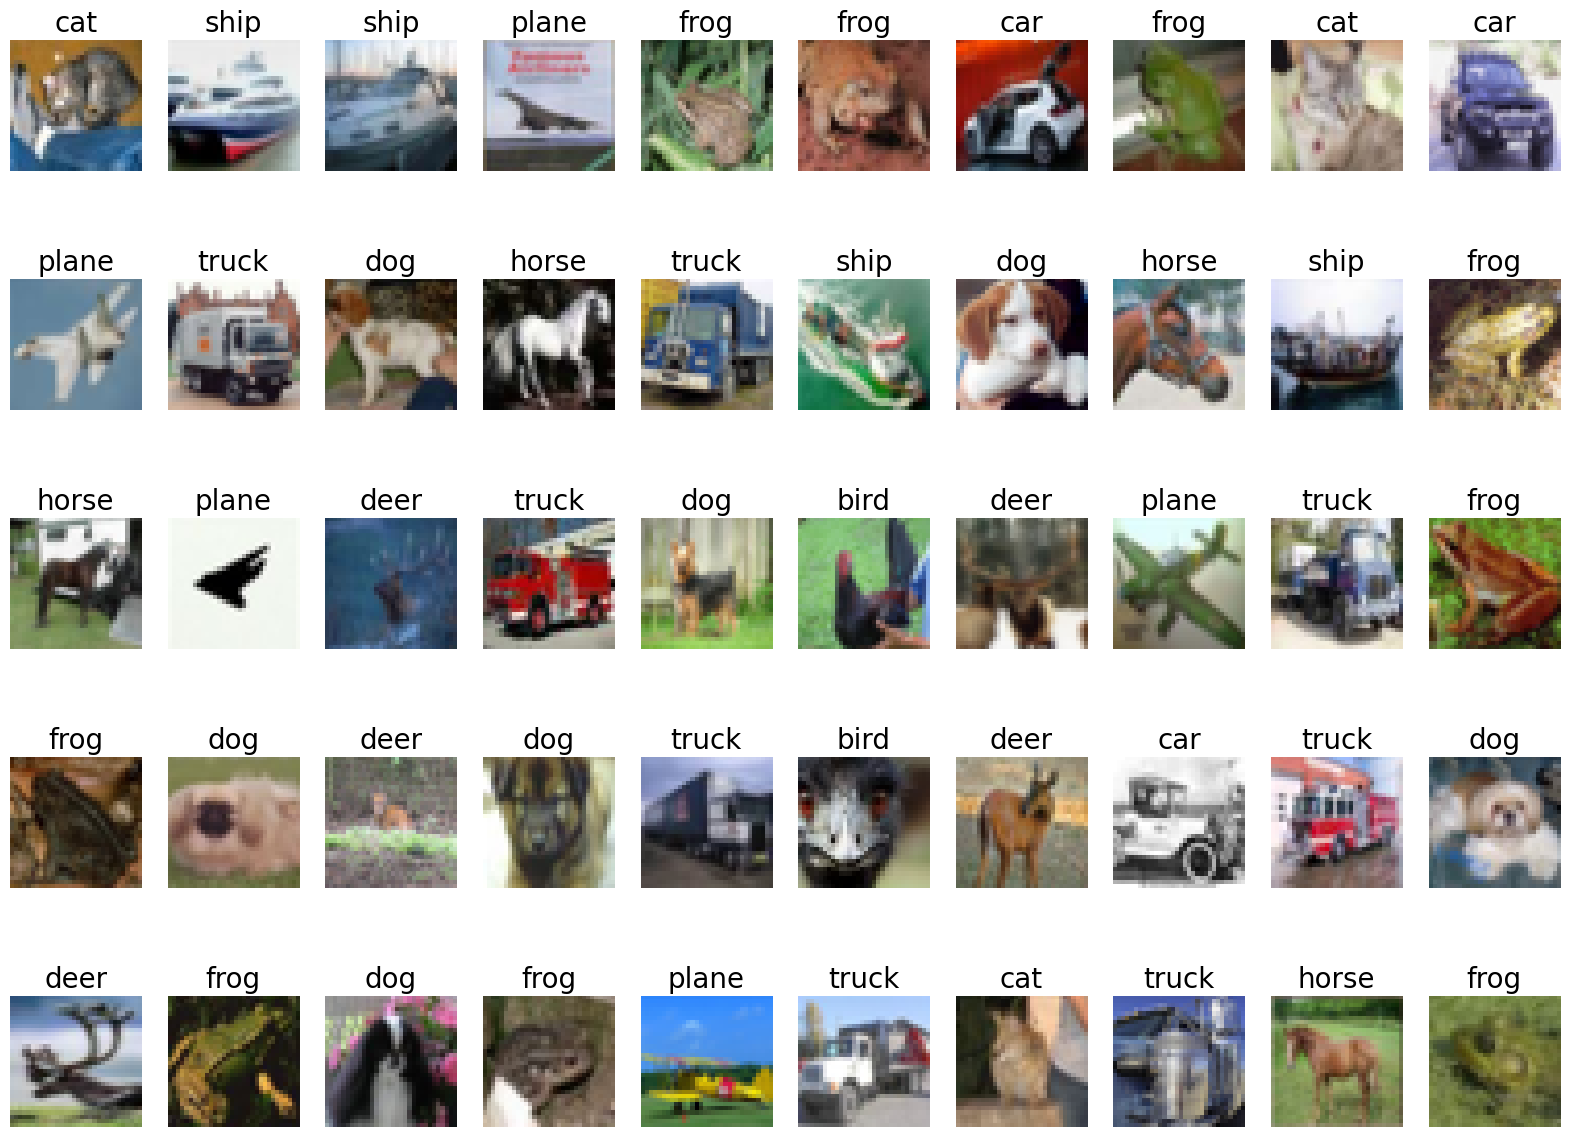

In [ ]:
# 정답 라벨 정의
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 검증 데이터의 처음 50개를 출력
show_images_labels(test_loader2, classes, None, None)

# 모델 정의

In [ ]:
# 입력 차원수는 3*32*32=3072
n_input = image1.view(-1).shape[0]

# 출력 차원수
# 분류 클래스의 수이므로 10
n_output = len(set(list(labels1.data.numpy())))

# 은닉층의 노드수
n_hidden = 128

# 결과 확인
print(f'n_input: {n_input}  n_hidden: {n_hidden} n_output: {n_output}')

n_input: 3072  n_hidden: 128 n_output: 10


In [ ]:
# 모델 정의
# 3072입력 10출력 1은닉층을 포함한 신경망 모델
class Net(nn.Module):
  def __init__(self, n_input, n_output, n_hidden):
    super().__init__()

    # 은닉층 정의
    self.l1 = nn.Linear(n_input, n_hidden)

    # 출력층 정의
    self.l2 = nn.Linear(n_hidden, n_output)

    # ReLU 함수 정의
    self.relu = nn.ReLU(inplace=True)

  def forward(self, x):
    x1 = self.l1(x)
    x2 = self.relu(x1)
    x3 = self.l2(x2)

    return x3

# 모델 인스턴스 생성과 GPU 할당

In [ ]:
net = Net(n_input, n_output, n_hidden).to(device)

# 손실 함수
criterion = nn.CrossEntropyLoss()

# 학습률
lr = 0.01

# 최적화 함수: 경사 하강법
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [ ]:
print(net)

Net(
  (l1): Linear(in_features=3072, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [ ]:
summary(net, (10,3072), depth=1)

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [10, 10]                  --
├─Linear: 1-1                            [10, 128]                 393,344
├─ReLU: 1-2                              [10, 128]                 --
├─Linear: 1-3                            [10, 10]                  1,290
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 3.95
Input size (MB): 0.12
Forward/backward pass size (MB): 0.01
Params size (MB): 1.58
Estimated Total Size (MB): 1.71

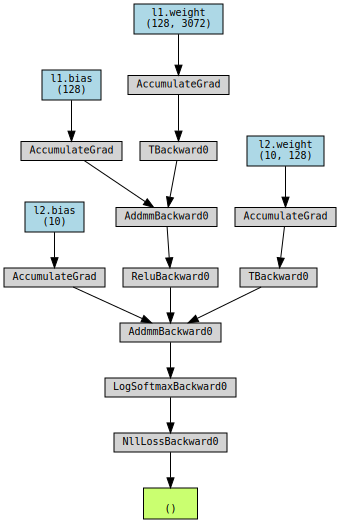

In [ ]:
# 손실 계산
loss = eval_loss(test_loader1, device, net, criterion)

# 손실 계산 그래프 시각화
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

# 학습 (Fully Connected Neural Network)

In [ ]:
torch_seed()

net = Net(n_input, n_output, n_hidden).to(device)

# 손실 함수
criterion = nn.CrossEntropyLoss()

# 학습률
lr = 0.01

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

num_epochs = 50

# 평과 결과 기록
history = np.zeros((0,5))

# 학습
history = fit(net, optimizer, criterion, num_epochs, train_loader1, test_loader1, device, history)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/50], loss: 0.01950 acc: 0.32200 val_loss: 0.01794, val_acc: 0.37670


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/50], loss: 0.01738 acc: 0.39572 val_loss: 0.01684, val_acc: 0.41710


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/50], loss: 0.01655 acc: 0.42402 val_loss: 0.01622, val_acc: 0.43840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/50], loss: 0.01602 acc: 0.44248 val_loss: 0.01583, val_acc: 0.45120


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/50], loss: 0.01563 acc: 0.45530 val_loss: 0.01553, val_acc: 0.46100


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/50], loss: 0.01532 acc: 0.46754 val_loss: 0.01530, val_acc: 0.46890


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/50], loss: 0.01505 acc: 0.47748 val_loss: 0.01512, val_acc: 0.47340


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/50], loss: 0.01480 acc: 0.48604 val_loss: 0.01493, val_acc: 0.47770


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/50], loss: 0.01457 acc: 0.49572 val_loss: 0.01480, val_acc: 0.48660


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/50], loss: 0.01435 acc: 0.50454 val_loss: 0.01463, val_acc: 0.49010


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/50], loss: 0.01413 acc: 0.51112 val_loss: 0.01450, val_acc: 0.49580


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/50], loss: 0.01394 acc: 0.52008 val_loss: 0.01437, val_acc: 0.50260


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/50], loss: 0.01375 acc: 0.52678 val_loss: 0.01425, val_acc: 0.50590


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/50], loss: 0.01357 acc: 0.53504 val_loss: 0.01423, val_acc: 0.50620


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/50], loss: 0.01341 acc: 0.53924 val_loss: 0.01407, val_acc: 0.51360


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/50], loss: 0.01324 acc: 0.54590 val_loss: 0.01402, val_acc: 0.51110


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/50], loss: 0.01307 acc: 0.55108 val_loss: 0.01391, val_acc: 0.51370


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/50], loss: 0.01293 acc: 0.55716 val_loss: 0.01388, val_acc: 0.51450


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/50], loss: 0.01278 acc: 0.56146 val_loss: 0.01379, val_acc: 0.51960


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/50], loss: 0.01264 acc: 0.56694 val_loss: 0.01380, val_acc: 0.51770


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [21/50], loss: 0.01251 acc: 0.57062 val_loss: 0.01372, val_acc: 0.51810


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [22/50], loss: 0.01237 acc: 0.57726 val_loss: 0.01368, val_acc: 0.52580


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [23/50], loss: 0.01225 acc: 0.58008 val_loss: 0.01363, val_acc: 0.52750


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [24/50], loss: 0.01213 acc: 0.58402 val_loss: 0.01355, val_acc: 0.52440


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [25/50], loss: 0.01200 acc: 0.59174 val_loss: 0.01352, val_acc: 0.52750


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [26/50], loss: 0.01189 acc: 0.59382 val_loss: 0.01351, val_acc: 0.52900


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [27/50], loss: 0.01177 acc: 0.59886 val_loss: 0.01349, val_acc: 0.52720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [28/50], loss: 0.01167 acc: 0.60206 val_loss: 0.01343, val_acc: 0.52960


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [29/50], loss: 0.01156 acc: 0.60540 val_loss: 0.01342, val_acc: 0.52840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [30/50], loss: 0.01145 acc: 0.60976 val_loss: 0.01346, val_acc: 0.53010


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [31/50], loss: 0.01135 acc: 0.61516 val_loss: 0.01341, val_acc: 0.53010


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [32/50], loss: 0.01124 acc: 0.61786 val_loss: 0.01338, val_acc: 0.52870


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [33/50], loss: 0.01114 acc: 0.62116 val_loss: 0.01338, val_acc: 0.53070


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [34/50], loss: 0.01105 acc: 0.62616 val_loss: 0.01342, val_acc: 0.52810


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [35/50], loss: 0.01095 acc: 0.62846 val_loss: 0.01341, val_acc: 0.52730


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [36/50], loss: 0.01086 acc: 0.63218 val_loss: 0.01334, val_acc: 0.53210


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [37/50], loss: 0.01076 acc: 0.63564 val_loss: 0.01340, val_acc: 0.52820


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [38/50], loss: 0.01067 acc: 0.63948 val_loss: 0.01336, val_acc: 0.53080


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [39/50], loss: 0.01059 acc: 0.64206 val_loss: 0.01341, val_acc: 0.53010


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [40/50], loss: 0.01050 acc: 0.64520 val_loss: 0.01348, val_acc: 0.52430


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [41/50], loss: 0.01041 acc: 0.64904 val_loss: 0.01340, val_acc: 0.52840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [42/50], loss: 0.01033 acc: 0.65044 val_loss: 0.01347, val_acc: 0.52820


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [43/50], loss: 0.01025 acc: 0.65418 val_loss: 0.01347, val_acc: 0.52500


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [44/50], loss: 0.01016 acc: 0.65598 val_loss: 0.01346, val_acc: 0.52490


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [45/50], loss: 0.01007 acc: 0.65942 val_loss: 0.01345, val_acc: 0.52630


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [46/50], loss: 0.01000 acc: 0.66198 val_loss: 0.01344, val_acc: 0.53020


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [47/50], loss: 0.00993 acc: 0.66424 val_loss: 0.01347, val_acc: 0.52600


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [48/50], loss: 0.00984 acc: 0.66810 val_loss: 0.01351, val_acc: 0.52960


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [49/50], loss: 0.00977 acc: 0.67072 val_loss: 0.01363, val_acc: 0.52110


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [50/50], loss: 0.00970 acc: 0.67242 val_loss: 0.01353, val_acc: 0.53100


초기상태 : 손실 : 0.01794  정확도 : 0.37670
최종상태 : 손실 : 0.01353 정확도 : 0.53100


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

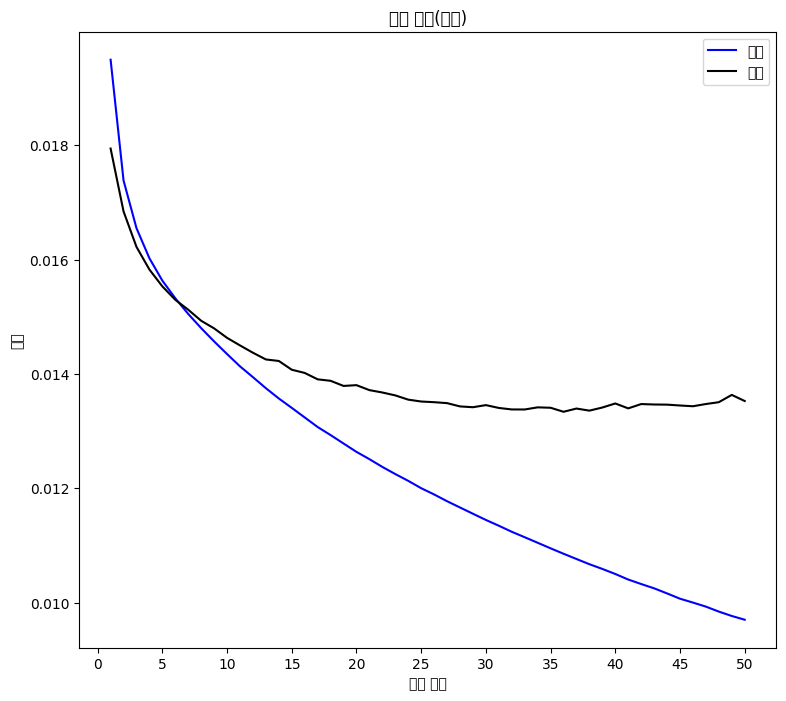

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


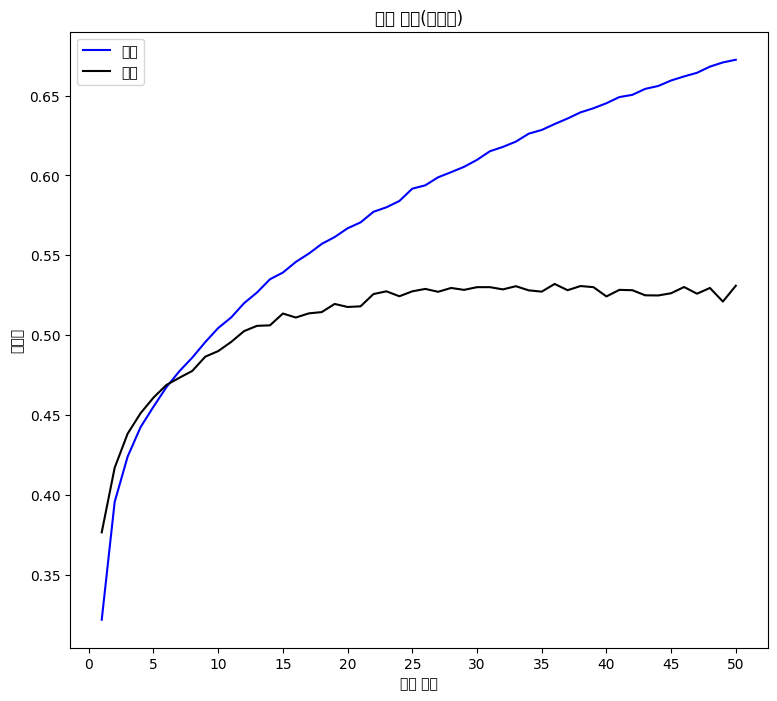

In [ ]:
# 평가
evaluate_history(history)

# CNN

In [ ]:
class CNN(nn.Module):
  def __init__(self, n_output, n_hidden):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 32, 3)
    self.conv2 = nn.Conv2d(32, 32, 3)
    self.relu = nn.ReLU(inplace=True)
    self.maxpool = nn.MaxPool2d((2,2))
    self.flatten = nn.Flatten()
    self.l1 = nn.Linear(6272, n_hidden)
    self.l2 = nn.Linear(n_hidden, n_output)

    self.features = nn.Sequential(
        self.conv1,
        self.relu,
        self.conv2,
        self.relu,
        self.maxpool
    )

    self.classifier = nn.Sequential(
        self.l1,
        self.relu,
        self.l2
    )

  def forward(self, x):
    x1 = self.features(x)
    x2 = self.flatten(x1)
    x3 = self.classifier(x2)

    return x3

In [ ]:
net = CNN(n_output, n_hidden).to(device)

criterion = nn.CrossEntropyLoss()

lr = 0.01

optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [ ]:
print(net)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=6272, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=6272, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
summary(net, (100,3,32,32), depth=1)

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [100, 10]                 --
├─Sequential: 1-1                        [100, 32, 14, 14]         10,144
├─Sequential: 1-4                        --                        (recursive)
├─Sequential: 1-5                        --                        (recursive)
├─Sequential: 1-4                        --                        (recursive)
├─Sequential: 1-5                        --                        (recursive)
├─Flatten: 1-6                           [100, 6272]               --
├─Sequential: 1-7                        [100, 10]                 804,234
Total params: 823,626
Trainable params: 823,626
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 886.11
Input size (MB): 1.23
Forward/backward pass size (MB): 43.22
Params size (MB): 3.26
Estimated Total Size (MB): 47.71

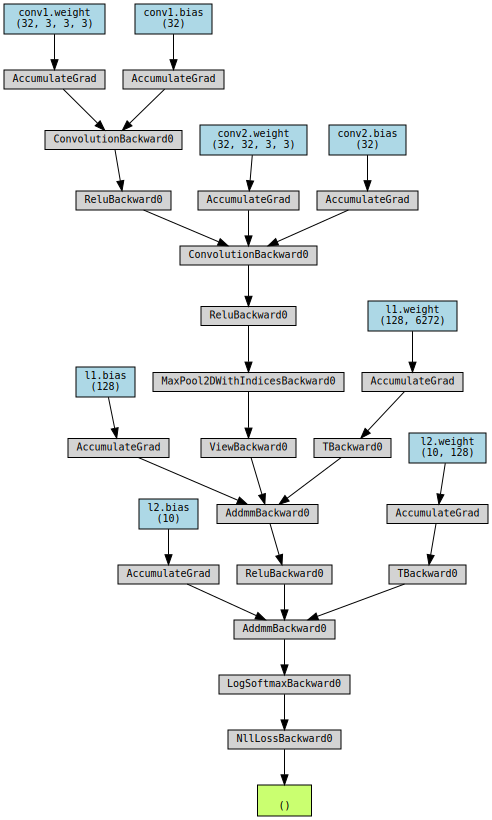

In [ ]:
loss = eval_loss(test_loader2, device, net, criterion)

g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

# 학습

In [ ]:
torch_seed()

net = CNN(n_output, n_hidden).to(device)

# 손실함수
criterion = nn.CrossEntropyLoss()

# 학습률
lr = 0.01

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 50

# 평가 결과 기록
history2 = np.zeros((0, 5))

# 학습
history2 = fit(net, optimizer, criterion, num_epochs, train_loader2, test_loader2, device, history2)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/50], loss: 0.02082 acc: 0.26104 val_loss: 0.01866, val_acc: 0.34680


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/50], loss: 0.01781 acc: 0.37282 val_loss: 0.01677, val_acc: 0.40960


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/50], loss: 0.01613 acc: 0.43034 val_loss: 0.01530, val_acc: 0.46020


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/50], loss: 0.01485 acc: 0.47316 val_loss: 0.01450, val_acc: 0.48920


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/50], loss: 0.01408 acc: 0.49958 val_loss: 0.01370, val_acc: 0.51190


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/50], loss: 0.01350 acc: 0.52032 val_loss: 0.01333, val_acc: 0.52670


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/50], loss: 0.01304 acc: 0.53648 val_loss: 0.01292, val_acc: 0.53810


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/50], loss: 0.01253 acc: 0.55444 val_loss: 0.01255, val_acc: 0.55040


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/50], loss: 0.01206 acc: 0.57406 val_loss: 0.01237, val_acc: 0.56150


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/50], loss: 0.01158 acc: 0.59128 val_loss: 0.01185, val_acc: 0.58130


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/50], loss: 0.01116 acc: 0.60852 val_loss: 0.01164, val_acc: 0.58880


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/50], loss: 0.01078 acc: 0.62366 val_loss: 0.01172, val_acc: 0.58210


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/50], loss: 0.01036 acc: 0.63748 val_loss: 0.01112, val_acc: 0.60600


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/50], loss: 0.00997 acc: 0.65058 val_loss: 0.01089, val_acc: 0.61400


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/50], loss: 0.00959 acc: 0.66442 val_loss: 0.01109, val_acc: 0.60420


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/50], loss: 0.00922 acc: 0.67736 val_loss: 0.01052, val_acc: 0.63310


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/50], loss: 0.00881 acc: 0.69292 val_loss: 0.01059, val_acc: 0.62680


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/50], loss: 0.00846 acc: 0.70416 val_loss: 0.01011, val_acc: 0.64970


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/50], loss: 0.00808 acc: 0.71932 val_loss: 0.01019, val_acc: 0.64220


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/50], loss: 0.00773 acc: 0.73156 val_loss: 0.01047, val_acc: 0.63290


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [21/50], loss: 0.00737 acc: 0.74306 val_loss: 0.01003, val_acc: 0.65560


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [22/50], loss: 0.00701 acc: 0.75794 val_loss: 0.01023, val_acc: 0.65170


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [23/50], loss: 0.00674 acc: 0.76642 val_loss: 0.00995, val_acc: 0.66050


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [24/50], loss: 0.00636 acc: 0.77964 val_loss: 0.01005, val_acc: 0.66190


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [25/50], loss: 0.00603 acc: 0.79354 val_loss: 0.01005, val_acc: 0.66770


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [26/50], loss: 0.00568 acc: 0.80552 val_loss: 0.01051, val_acc: 0.64770


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [27/50], loss: 0.00539 acc: 0.81632 val_loss: 0.01050, val_acc: 0.66360


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [28/50], loss: 0.00508 acc: 0.82704 val_loss: 0.01129, val_acc: 0.64340


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [29/50], loss: 0.00474 acc: 0.83938 val_loss: 0.01052, val_acc: 0.66780


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [30/50], loss: 0.00442 acc: 0.85192 val_loss: 0.01115, val_acc: 0.65470


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [31/50], loss: 0.00408 acc: 0.86310 val_loss: 0.01093, val_acc: 0.66650


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [32/50], loss: 0.00380 acc: 0.87168 val_loss: 0.01190, val_acc: 0.64340


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [33/50], loss: 0.00352 acc: 0.88442 val_loss: 0.01125, val_acc: 0.66860


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [34/50], loss: 0.00324 acc: 0.89232 val_loss: 0.01221, val_acc: 0.65490


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [35/50], loss: 0.00294 acc: 0.90590 val_loss: 0.01265, val_acc: 0.65370


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [36/50], loss: 0.00273 acc: 0.91166 val_loss: 0.01259, val_acc: 0.65610


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [37/50], loss: 0.00241 acc: 0.92468 val_loss: 0.01288, val_acc: 0.65980


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [38/50], loss: 0.00215 acc: 0.93400 val_loss: 0.01329, val_acc: 0.66300


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [39/50], loss: 0.00196 acc: 0.94010 val_loss: 0.01368, val_acc: 0.66200


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [40/50], loss: 0.00173 acc: 0.95072 val_loss: 0.01447, val_acc: 0.65340


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [41/50], loss: 0.00147 acc: 0.95962 val_loss: 0.01567, val_acc: 0.65220


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [42/50], loss: 0.00130 acc: 0.96538 val_loss: 0.01554, val_acc: 0.65100


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [43/50], loss: 0.00106 acc: 0.97508 val_loss: 0.01562, val_acc: 0.66010


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [44/50], loss: 0.00102 acc: 0.97636 val_loss: 0.01586, val_acc: 0.66340


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [45/50], loss: 0.00090 acc: 0.98114 val_loss: 0.01630, val_acc: 0.66530


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [46/50], loss: 0.00061 acc: 0.98958 val_loss: 0.01705, val_acc: 0.65710


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [47/50], loss: 0.00046 acc: 0.99420 val_loss: 0.01744, val_acc: 0.66550


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [48/50], loss: 0.00036 acc: 0.99638 val_loss: 0.01787, val_acc: 0.66530


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [49/50], loss: 0.00029 acc: 0.99784 val_loss: 0.01868, val_acc: 0.66210


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [50/50], loss: 0.00024 acc: 0.99850 val_loss: 0.01887, val_acc: 0.66490


초기상태 : 손실 : 0.01866  정확도 : 0.34680
최종상태 : 손실 : 0.01887 정확도 : 0.66490


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

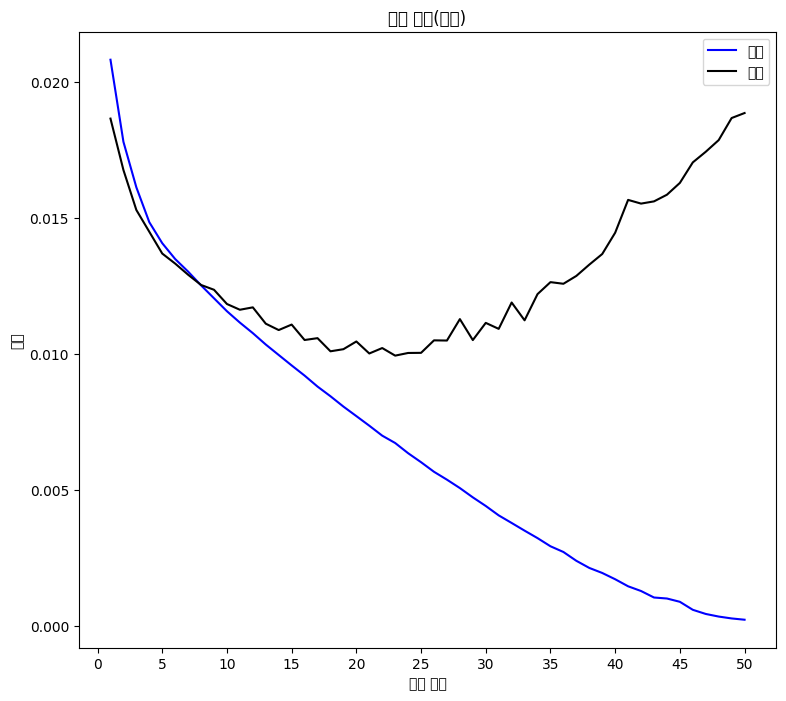

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


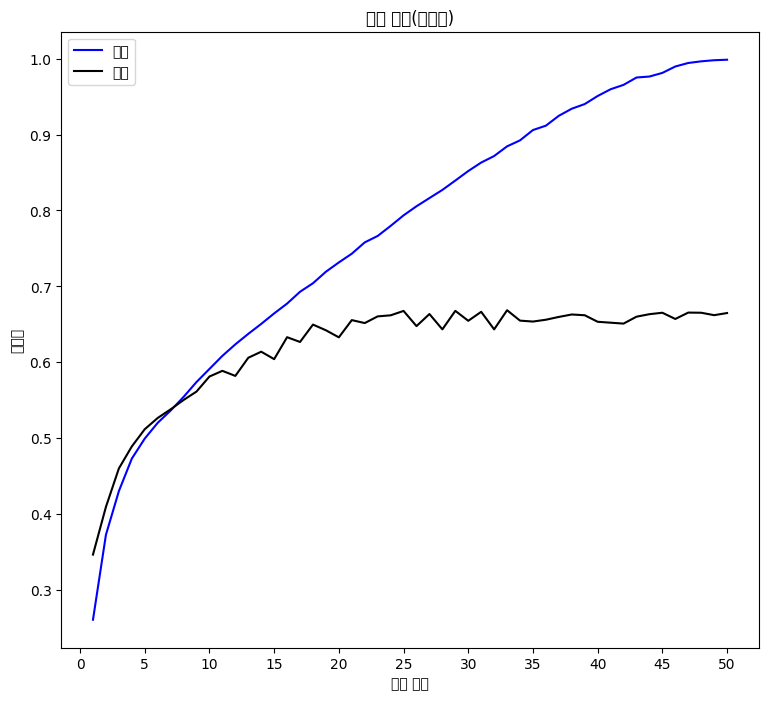

In [ ]:
# 평가

evaluate_history(history2)

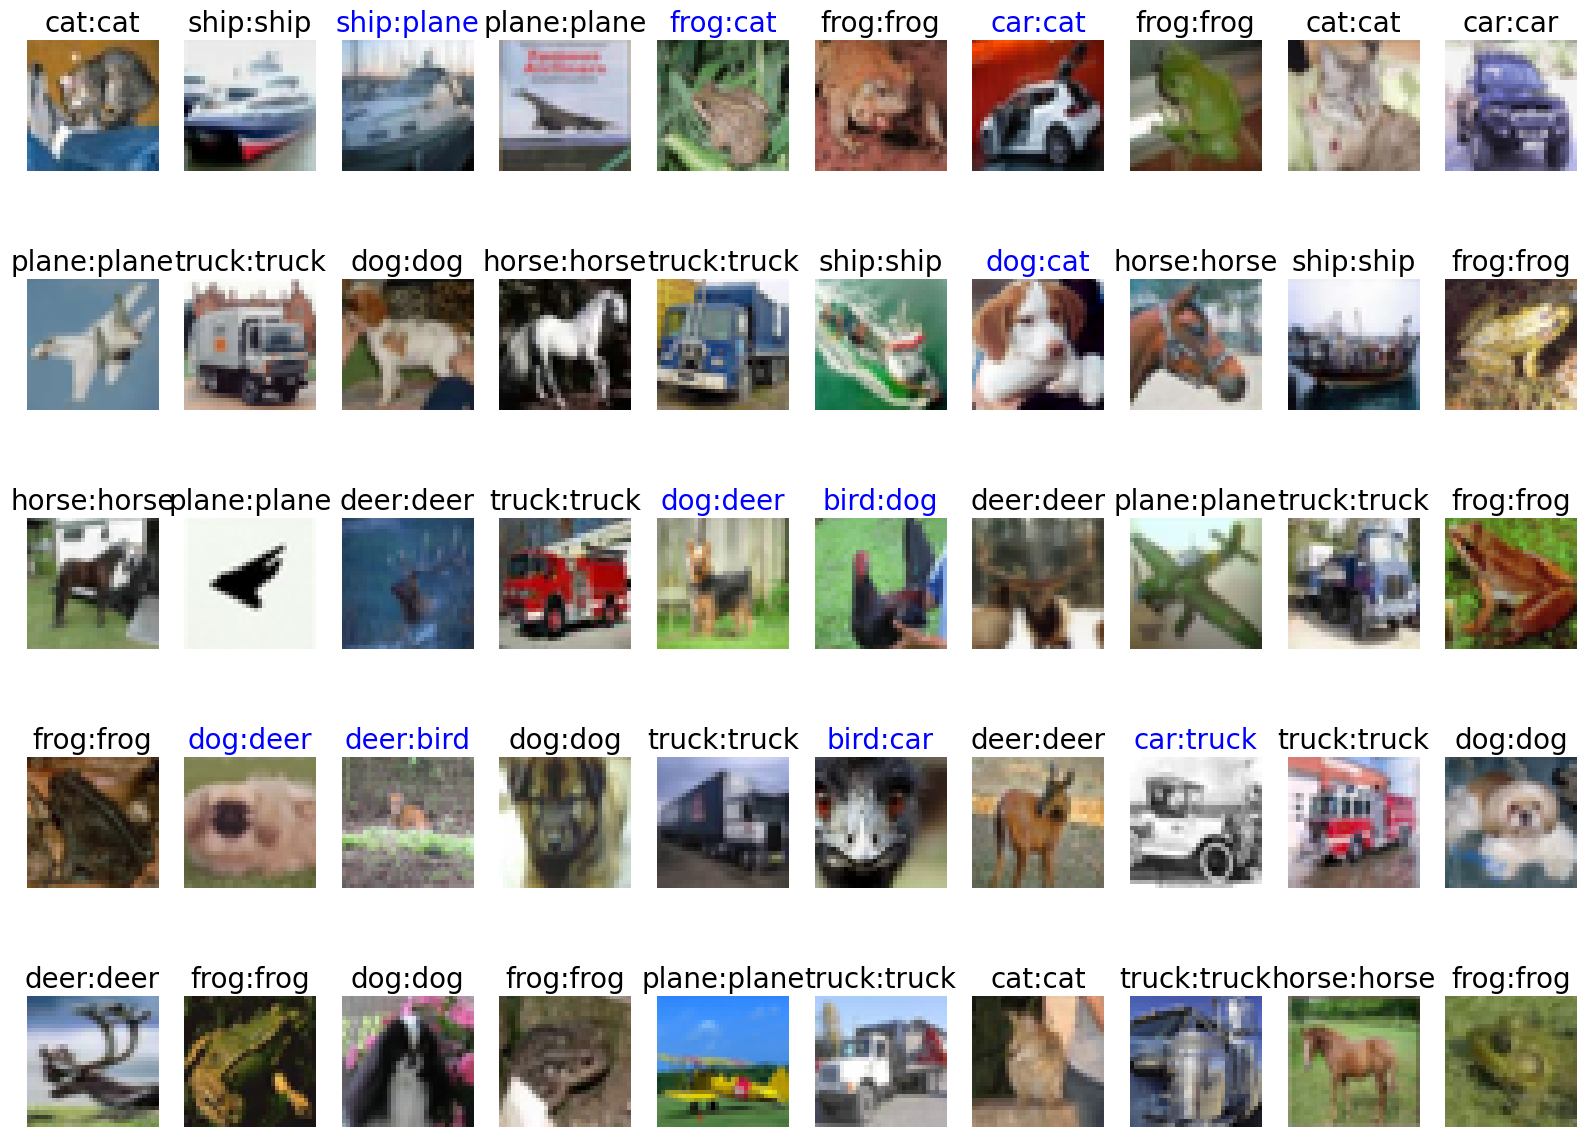

In [ ]:
# 처음 50개 데이터 표시

show_images_labels(test_loader2, classes, net, device)